# Mudcard
- **For the w-vector concept in the very end of the class, I'm wondering why does 2 vector of the same direction, different length, give 2 different 2 function values? For example, w = [2,-1.8] gives cost = 0.4, and w = [1,-0.9] gives cost = 0.43**
    - Great question!
    - The direction of the w vector determines where the decision boundary is because the decision boundary is perpendicular to w
    - The length of w determines the 'confidence' of the predictions
        - the predicted probability is determined by the distance from the decision bounday
        - the longer w is, the lest distance you need to go from the decision boundary to reach a p predicted probability
    - in the logloss metric, the cost doesn't just depend on the boundary (i.e., whether points are on the right or wrong side of the boundary)
    - the cost depends on the probabilities, which translates to the distance from the decision boundary
- **why the cost function of logistic regression has two scenarios: y_true = 0 and y_true = 1. The range of y is (0,1).Why it only has two options?**
    - that's how the true target variable is defined in binary classification.
    - I either find a papaya tasty (y_true = 1) or not (y_true = 0).
    - You can define y_true differently and we did already when we covered liner regression (y_true was continuous then)
- **Is there a reason why logistic regression is called 'regression' or was it arbitrary?**
    - regression back in the mid-20th century was defined more broadly than today, it meant predicting an outcome
    - the sigmoid function is also called the logistic function
    - these two bits combined explain why it is called logistic regression but it is used for classification
- **"I'm not sure what the two features of w is in the line 'w = [2,-2] # notice that w has two components and we have two features'. what does this mean?**
    - we calculate <w,X> so we have a w component per variable in our dataset
    - read more about the dot product and its meaning [here](https://en.wikipedia.org/wiki/Dot_product)
- **I'm wonder the logistic metric is telling the probability of what feature?**
    - not a feature, the target variable
- **Once I see the function sign, I get trouble - how much of the exact math do we need to know for the in-person final or should we focus on the application or code? I know how linear and logistic regression is applied but it gets muddy with the equations.**
- **I feel that the class time is not enough for me to truly understand every line of code, including some functions that I'm not familiar with**
- **I am confused on whether the equations were just given to us for the purpose of understanding the background or if we need to know these equations in the back of our mind. I am confused about how to translate the math equations into the code we are working on.**
    - see my post on [Ed](https://edstem.org/us/courses/83381/discussion/7013476)


# <center> Lecture 8: Polynomial regression and regularization</center>

By the end of this lecture, you will be able to
- Describe why regularization is important and what are the two types of regularization
- Describe how regularized linear regression works
- Describe how regularized logistic regression works


## <font color='LIGHTGRAY'>Regularization</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **Describe why regularization is important and what are the two types of regularization**
- <font color='LIGHTGRAY'>Describe how regularized linear regression works</font>
- <font color='LIGHTGRAY'>Describe how regularized logistic regression works</font>


# Polynomial regression
## Let's work with a new example dataset

(40, 1)
(40,)


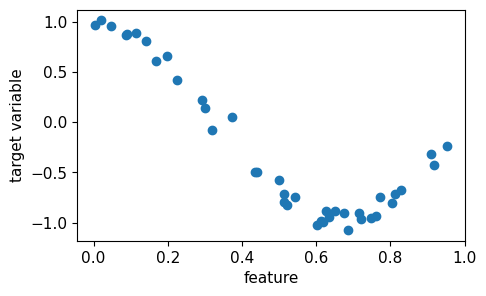

In [16]:
# load packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib
matplotlib.rcParams.update({'font.size': 11})

df = pd.read_csv('../data/regularization_example.csv')
X_ori = df['x0'].values.reshape(-1, 1)
y = df['y'].values
print(np.shape(X_ori))
print(np.shape(y))

# visualize the data
plt.figure(figsize=(5,3))
plt.scatter(X_ori,y)
plt.xlabel('feature')
plt.ylabel('target variable')
plt.show()

In [17]:
# lets generate more features because a linear model will obviously be insufficient to fit the data well
pf = PolynomialFeatures(degree = 20,include_bias=False)
X = pf.fit_transform(X_ori)
print(np.shape(X))
print(pf.get_feature_names_out())

(40, 20)
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10'
 'x0^11' 'x0^12' 'x0^13' 'x0^14' 'x0^15' 'x0^16' 'x0^17' 'x0^18' 'x0^19'
 'x0^20']


## We split data into train and validation!

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
print(np.shape(X_train),np.shape(y_train))
print(np.shape(X_val),np.shape(y_val))

(32, 20) (32,)
(8, 20) (8,)


## Let's train and validate some linear regression models

### Use the first feature only

intercept: 0.8018842867499774
w: [-2.08151827]
train MSE: 0.13964692457239297
val MSE: 0.1714251606233729


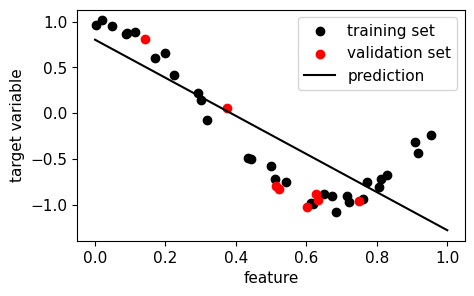

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# let's use only the first feature
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train[:,:1], y_train)
print('intercept:',linreg.intercept_)
print('w:',linreg.coef_)

train_MSE = mean_squared_error(y_train,linreg.predict(X_train[:,:1]))
val_MSE = mean_squared_error(y_val,linreg.predict(X_val[:,:1]))
print('train MSE:',train_MSE)
print('val MSE:',val_MSE)


# let's visualuze the model
x_model = np.linspace(0,1,100)
plt.figure(figsize=(5,3))
plt.scatter(X_train[:,0],y_train,color='k',label='training set')
plt.scatter(X_val[:,0],y_val,color='r',label='validation set')
plt.plot(x_model,linreg.predict(x_model.reshape(-1,1)),color='k',label='prediction')
plt.xlabel('feature')
plt.ylabel('target variable')
plt.legend()
plt.show()


### Use all features

intercept: 1.0123143561425278
ws: [-1.96093294e+01  2.36513626e+03 -1.07393992e+05  2.50225090e+06
 -3.53253437e+07  3.31465492e+08 -2.18900095e+09  1.05456431e+10
 -3.78267222e+10  1.01733036e+11 -2.03422807e+11  2.92186021e+11
 -2.71104618e+11  9.03890007e+10  1.56380017e+11 -2.94809458e+11
  2.54968343e+11 -1.30001762e+11  3.76756544e+10 -4.82188511e+09]
train MSE: 0.002222765866268214
val MSE: 0.03332565989620885


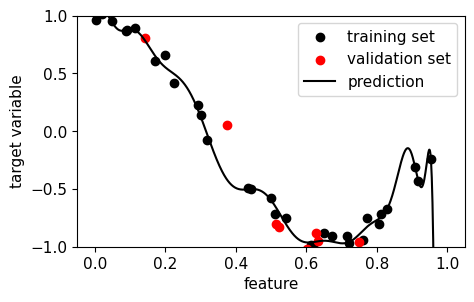

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# use all features
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)
print('intercept:',linreg.intercept_)
print('ws:',linreg.coef_)

train_MSE = mean_squared_error(y_train,linreg.predict(X_train))
val_MSE = mean_squared_error(y_val,linreg.predict(X_val))
print('train MSE:',train_MSE)
print('val MSE:',val_MSE)


# let's visualuze the model
x_model = np.linspace(0,1,1000)
plt.figure(figsize=(5,3))
plt.scatter(X_train[:,0],y_train,color='k',label='training set')
plt.scatter(X_val[:,0],y_val,color='r',label='validation set')
plt.plot(x_model,linreg.predict(pf.transform(x_model.reshape(-1,1))),color='k',label='prediction')
plt.ylim([-1,1])
plt.xlabel('feature')
plt.ylabel('target variable')
plt.legend()
plt.show()


## What to do?
- the model is visibly performs poorly when only the original feature is used
- the model performs very good on the training set but poorly on the validation set when all features are used
    - the ws are huge!

## Regulazation solves this problem!


## <font color='LIGHTGRAY'>Regularization</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe why regularization is important and what are the two types of regularization</font>
- **Describe how regularized linear regression works**
- <font color='LIGHTGRAY'>Describe how regularized logistic regression works</font>


## Regularization to the rescue!
- let's change the cost function and add a <font color='RED'>penalty term</font> for large ws
- **Lasso regression**: regularize using the l1 norm of w:
   
<center>$L(w) = \frac{1}{m}\sum_{i=1}^{m}[(w_0 + \sum_{j=1}^{d} w_j  x_{ij}- y_i)^2] + \color{red}{ \alpha \sum_{j=0}^{d}|w_j|}$</center>   
   
- **Ridge regression**: regularize using the square of the l2 norm of w:
   
<center>$L(w) = \frac{1}{m}\sum_{i=1}^{m}[(w_0 + \sum_{j=1}^{d} w_j  x_{ij}- y_i)^2] + \color{red}{\alpha \sum_{j=0}^{d} w_j^2}$</center>

- $\alpha$ is the regularization parameter (positive number), it describes how much we penalize large ws

- With the cost function changed, the derivatives in gradient descent need to be updated too!

## Feature selection with Lasso regularization
- Least Absolute Shrinkage and Selection Operator
- cost = MSE + $\alpha$ * l1 norm of $w$
<center>$L(w) = \frac{1}{m}\sum_{i=1}^{m}[(w_0 + \sum_{j=1}^{d} w_j  x_{ij}- y_i)^2] + \color{red}{ \alpha \sum_{j=0}^{d}|w_j|}$</center>  
- ideal for feature selection
- as $\alpha$ increases, more and more feature weights are reduced to 0.

In [42]:
from  sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = np.logspace(-7,0,29)
ws = []
models = []
train_MSE = np.zeros(len(alpha))
val_MSE = np.zeros(len(alpha))

# do the fit
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = Lasso(alpha=alpha[i],max_iter=100000000)
    lin_reg.fit(X_train, y_train)
    ws.append(lin_reg.coef_)
    models.append(lin_reg)
    train_MSE[i] = mean_squared_error(y_train,lin_reg.predict(X_train))
    val_MSE[i] = mean_squared_error(y_val,lin_reg.predict(X_val))

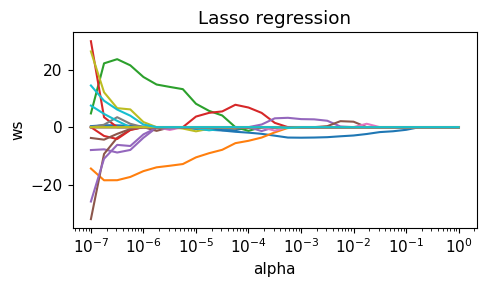

In [43]:
plt.figure(figsize=(5,3))
plt.plot(alpha, ws)
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('ws')
plt.title('Lasso regression')
plt.tight_layout()
plt.savefig('../figures/lasso_coefs.png',dpi=300)
plt.show()

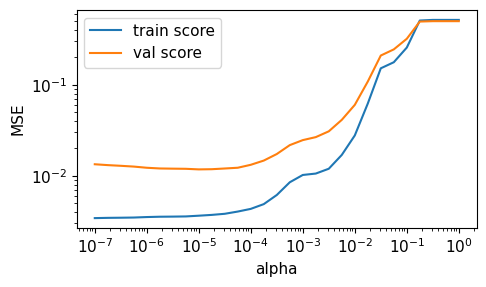

In [44]:
plt.figure(figsize=(5,3))
plt.plot(alpha,train_MSE,label='train score')
plt.plot(alpha,val_MSE,label='val score')
plt.semilogy()
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/train_val_MSE_lasso.png',dpi=300)
plt.show()

## Bias vs variance
- Bias: the model performs poorly on both the train and validation sets
    - high alpha in our example
- the model performs very well on the training set but it performs poorly on the validation set
    - low alpha in our example
    - lowering the alpha further would improve the train score but the validation score would increase
    - we don't do it because of convergence issues

# The bias-variance trade off
- the curve of the validation score as a function of a hyper-parameter usually has a U shape if evaluation metric needs to be minimized, or an inverted U if the metric needs to be maximized
- choose the hyper-parameter value that gives you the best validation score

##  Quiz
Which alpha value gives the best validation score? Visualize the corresponding model! 

[1.00000000e-07 1.77827941e-07 3.16227766e-07 5.62341325e-07
 1.00000000e-06 1.77827941e-06 3.16227766e-06 5.62341325e-06
 1.00000000e-05 1.77827941e-05 3.16227766e-05 5.62341325e-05
 1.00000000e-04 1.77827941e-04 3.16227766e-04 5.62341325e-04
 1.00000000e-03 1.77827941e-03 3.16227766e-03 5.62341325e-03
 1.00000000e-02 1.77827941e-02 3.16227766e-02 5.62341325e-02
 1.00000000e-01 1.77827941e-01 3.16227766e-01 5.62341325e-01
 1.00000000e+00]
[0.01338448 0.01309451 0.01287111 0.01262066 0.01225013 0.01203405
 0.01197593 0.01193075 0.01175587 0.0118109  0.01202519 0.01225549
 0.0132055  0.01469088 0.0173341  0.02170684 0.02463496 0.02657118
 0.03076408 0.04111323 0.06004434 0.10825084 0.20888887 0.24393615
 0.31899593 0.4927477  0.49768979 0.49768979 0.49768979]
[1.e-05]
1e-05


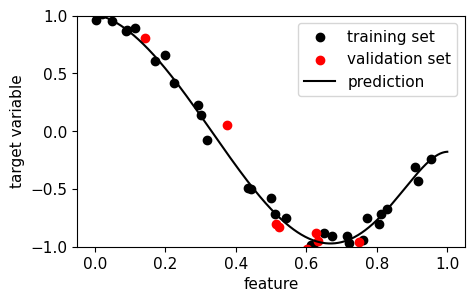

In [53]:
# your code here
print(alpha)
print(val_MSE)
print(alpha[val_MSE == np.min(val_MSE)])
# or equivalently
print(alpha[np.argmin(val_MSE)])

x_model = np.linspace(0,1,1000)
plt.figure(figsize=(5,3))
plt.scatter(X_train[:,0],y_train,color='k',label='training set')
plt.scatter(X_val[:,0],y_val,color='r',label='validation set')
plt.plot(x_model,models[np.argmin(val_MSE)].predict(pf.transform(x_model.reshape(-1,1))),color='k',label='prediction')
plt.ylim([-1,1])
plt.xlabel('feature')
plt.ylabel('target variable')
plt.legend()
plt.show()



# Mudcard from previous lecture
- **will we be expected to memorize scikit learn functions (e.g. argmin) for the midterm and future assignments? maybe it's because it's new, but i struggled with the coding question today in lecture**
    - Yes, you sohuld know what np.argmin and np.armmax are used for
- **Could you please go over Quiz 1 again? I printed alpha[np.argmin(val_MSE)] and got 1e-07**
    - I think we found the bug after the lecture, right?
- **how to determine the value of alpha?**
    - We are looking for the alpha when the vlaidation score is optimized
- **Could you explain the math behind lasso regularization further?**
- **I am curious how you interpret the Lasso regression graph that we printed out?**
- **How do you recommend we learn and familiarize ourselves with the Lasso and Ride regressions? I felt those were a little rushed.**
- **I'm still a bit confused on how to read the Lasso regression plot. What does it mean when the alpha value is larger and what does it mean when the alpha is smaller? What does it mean when all coefficients shrink to zero?**
    - We will go through that again today
- **what are best uses of lasso vs ridge regression?**
    - They are both different ways to handle model complexity
    - Ridge is also used for feature selection
- **Do we need to memorize the equations for the final? Will we get an example final exam or what to expect?**
    - Yes, you are expected to know the equations
    - I'll provide some example questions
- **how do know which method should I use of two regularizations?**
    - If in doubt, use both.
    - Generally speaking, you'll see that we will apply as many ML methods as we can on a dataset
    - Start with the linear models, and then move on to more complex non-linear models

## The bias-variance tradeoff with Ridge regularization
- cost = MSE + $\alpha$ * (l2 norm of $w$)^2
<center>$L(w) = \frac{1}{m}\sum_{i=1}^{m}[(w_0 + \sum_{j=1}^{d} w_j  x_{ij}- y_i)^2] + \color{red}{\alpha \sum_{j=0}^{d} w_j^2}$</center>

- as $\alpha$ approaches 0, we reproduce the linear regression weights
- small $\alpha$ creates high variance
- large $\alpha$ creates high bias

In [54]:
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha = np.logspace(-10,0,51)

# arrays to save train and test MSE scores
train_MSE = np.zeros(len(alpha))
val_MSE = np.zeros(len(alpha))

ws = []
models = []
# do the fit
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = Ridge(alpha=alpha[i])
    lin_reg.fit(X_train, y_train)
    models.append(lin_reg)
    ws.append(lin_reg.coef_)
    # train and test scores
    train_MSE[i] = mean_squared_error(y_train,lin_reg.predict(X_train))
    val_MSE[i] = mean_squared_error(y_val,lin_reg.predict(X_val))

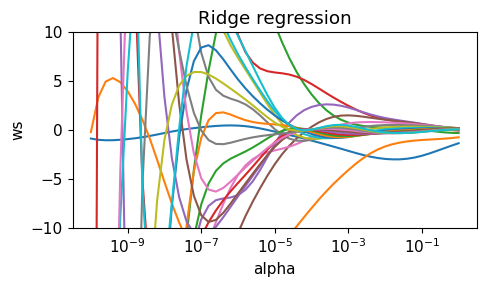

In [60]:
plt.figure(figsize=(5,3))
plt.plot(alpha, ws) 
plt.semilogx()
plt.ylim([-1e1,1e1])
plt.xlabel('alpha')
plt.ylabel('ws')
plt.title('Ridge regression')
plt.tight_layout()
plt.savefig('../figures/ridge_coefs.png',dpi=300)
plt.show()

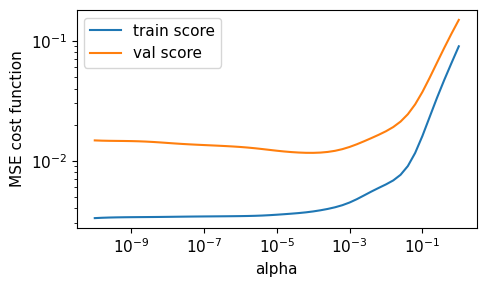

In [61]:
plt.figure(figsize=(5,3))
plt.plot(alpha,train_MSE,label='train score')
plt.plot(alpha,val_MSE,label='val score')
plt.semilogy()
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('MSE cost function')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/train_val_MSE_ridge.png',dpi=300)
plt.show()

## Quiz
Which $\alpha$ gives us the best tradeoff between bias and variance?

In [62]:
# your code here:
alpha[np.argmin(val_MSE)]


np.float64(0.0001)

## <font color='LIGHTGRAY'>Regularization</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe why regularization is important and what are the two types of regularization</font>
- <font color='LIGHTGRAY'>Describe how regularized linear regression works</font>
- **Describe how regularized logistic regression works**





## Logistic regression
- Recap: the logloss metric is the cost function

<center>$L(w) = - \frac{1}{m}\sum_{i=1}^{m} [y_i\ln(y_i') + (1-y_i)\ln(1-y_i')]$ </center>
<center>$L(w) =  - \frac{1}{m}\sum_{i=1}^{m} [y_i\ln(\frac{1}{1+e^{-w_0 + \sum_{j=1}^{d} w_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-w_0 + \sum_{j=1}^{d} w_j  x_{ij}}})]$</center>

   - the logloss metric with l1 regularization

<center>$L(w) = - \frac{1}{m}\sum_{i=1}^{m} [y_i\ln(\frac{1}{1+e^{-w_0 + \sum_{j=1}^{d} w_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-w_0 + \sum_{j=1}^{d} w_j  x_{ij}}}))] + \color{red}{ \alpha \sum_{j=0}^{d}|w_j|}$</center>

   - the logloss metric with l2 regularization

<center>$L(w) = - \frac{1}{m}\sum_{i=1}^{m} [y_i\ln(\frac{1}{1+e^{-w_0 + \sum_{j=1}^{d} w_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-w_0 + \sum_{j=1}^{d} w_j  x_{ij}}}))] + \color{red}{\alpha \sum_{j=0}^{d} w_j^2}$</center>

## Logistic regression in sklearn

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg_l1 = LogisticRegression(penalty='l1', C = 1/alpha) # C is the inverse of the regularization strength
log_reg_l2 = LogisticRegression(penalty='l2', C = 1/alpha)
# fit, predict, predict_proba are available 
# log_reg.coef_ returns the w values


In [15]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be converted
 |  (and copied).
 |
 |  The 'newton-cg', 'sag', and 'lbfgs' solvers support

# Mudcard